In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import csv
import numpy as np
import pandas as pd
import os
import seaborn as sn
from os.path import join
sn.set_context('talk')

In [77]:
datcornn = pd.read_csv(join('perf', 'mackeyglass_coRNN_5.csv'))
maxpres = 64
datcornn['presnum_epoch'] = ((datcornn.batch_idx) + maxpres*datcornn.epoch)/maxpres
datcornn['Model'] = ["coRNN"]*len(datcornn)
print(datcornn.shape)
full_dat = datcornn

datlstm = pd.read_csv(join('perf', 'mackeyglass_lstm_12.csv'))
maxpres = 64
datlstm['presnum_epoch'] = ((datlstm.batch_idx) + maxpres*datlstm.epoch)/maxpres
datlstm['Model'] = ["LSTM"]*len(datlstm)
print(datlstm.shape)
full_dat = full_dat.append(datlstm)

datlmu = pd.read_csv(join('perf', 
                          #'mackeyglass_deepsith_18.csv'))
                          'mackeyglass_lmu_10.csv'))
maxpres = 64
datlmu['presnum_epoch'] = ((datlmu.batch_idx) + maxpres*datlmu.epoch)/maxpres
datlmu['Model'] = ["LMU"]*len(datlmu)
print(datlmu.shape)
full_dat = full_dat.append(datlmu)

datsith = pd.read_csv(join('perf', 'mackeyglass_deepsith_20.csv'))
maxpres = 64
datsith['presnum_epoch'] = ((datsith.batch_idx) + maxpres*datsith.epoch)/maxpres
datsith['Model'] = ["SITH"]*len(datsith)
#datsith['last_test'] = datsith['last_testperf']
print(datsith.shape)
full_dat = full_dat.append(datsith)



(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)


In [80]:
gb = full_dat.groupby('Model')
gb.aggregate(np.min)['last_test']
b = gb.aggregate(np.min)['last_test']
rows =[x[0] for x in b.items()]
cells = ["{:.5f}".format(x) for x in b.to_numpy()]
cols = ["NRMSE"]
print(rows, cells, cols)
print(cells)

['LMU', 'LSTM', 'SITH', 'coRNN'] ['0.04035', '0.03961', '0.01662', '0.03646'] ['NRMSE']
['0.04035', '0.03961', '0.01662', '0.03646']


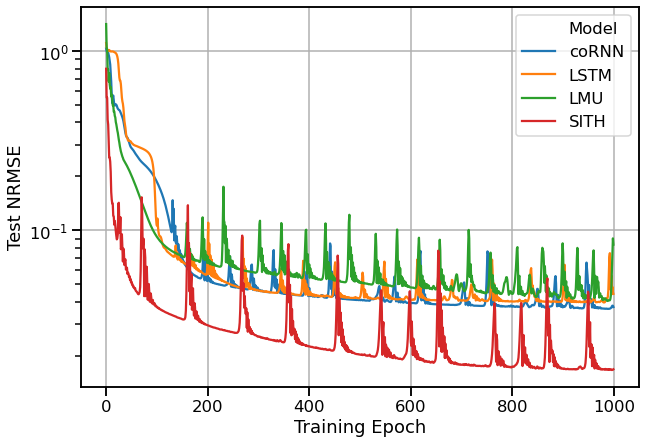

In [82]:

fig = plt.figure(figsize=(10,7))
ax = sn.lineplot(data=full_dat, x="presnum_epoch", y='last_test', 
                 hue="Model")
plt.ylabel('Test NRMSE')
plt.xlabel('Training Epoch')
plt.grid(True)

#ax.set_xlim(0, 500)
#ax.set_ylim(.00, .05)
plt.yscale('log')
plt.savefig('mackey_glass_test.png',
            #bbox='tight',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=150
            )

In [16]:
gb = full_dat.groupby('model')
gb.aggregate(np.min)['last_test']

0.040353376

In [52]:
b = gb.aggregate(np.min)['last_test']
rows =[x[0] for x in b.items()]
cells = ["{:.5f}".format(x) for x in b.to_numpy()]
cols = ["NRMSE"]
print(rows, cells, cols)
print(cells)

['LMU', 'LSTM', 'SITH', 'coRNN'] ['0.04035', '0.03961', '0.01662', '0.03646'] ['NRMSE']
['0.04035', '0.03961', '0.01662', '0.03646']


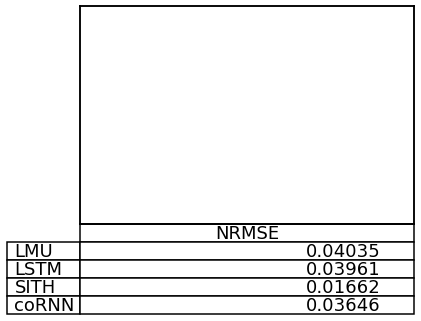

In [58]:
tab = plt.table(cellText=[[x] for x in cells],
                rowLabels=rows,
                colLabels=cols,)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
tab.scale(1, 1.5)

In [41]:
["{:.5f}".format(x) for x in b.to_numpy()]

['0.04035', '0.03961', '0.01662', '0.03646']

In [46]:
b = gb.aggregate(np.min)['last_test'].items()
[x[0] for x in b]

['LMU', 'LSTM', 'SITH', 'coRNN']